# Laplace'scher Entwicklungssatz

### Theorie

\begin{align*}
    \operatorname{det}_n A = \sum_{i=1}^{n} (-1)^{i+j} a_{ij} \operatorname{det}_{n-1} A_{ij}
\end{align*}

\begin{align*}
    A^{-1} = \frac{1}{\det A} \, \operatorname{adj} A
\end{align*}

\begin{align*}
    \operatorname{adj} A = \bigl(\operatorname{cof} A\bigr)^T \quad , \quad \operatorname{cof} A = \left( (-1)^{i+j} \cdot \operatorname{det}_{n-1} A_{ij} \right)_{ij}
\end{align*}

### Implementierung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.linalg
import time

In [2]:
def get_Minor(nparray, i, j):
    
    """Returns the Minor of a given array, i.e. the i-th row and j-th column will be deleted."""
    
    nparray = np.delete(nparray, i, 0)
    nparray = np.delete(nparray, j, 1)
    return nparray


def laplace_1(nparray):
    
    """Laplace algorithm, where the recursion ends at 1x1 matrices."""
    
    det = 0
    j = 0
    if (len(nparray) != len(nparray[0])):
        print("No Determinant for a nxm-Matrix!")
    elif len(nparray) == 1:
        det = nparray[0][0]
    else:
        for i in range(0, len(nparray)):
            det = det + ( nparray[i][j] * ((-1)**(i+1+j+1)) *
                         laplace_1(get_Minor(nparray, i, j)) )
    return det


def laplace_2(nparray):
    
    """Laplace algorithm, where the recursion ends at 2x2 matrices."""
    
    det = 0
    j = 0
    if (len(nparray) != len(nparray[0])):
        print("No Determinant for a nxm-Matrix!")
    elif len(nparray) == 1:
        det = nparray[0][0]
    elif len(nparray) == 2:
        det = nparray[0][0] * nparray[1][1] - nparray[1][0] * nparray[0][1]
    else:
        for i in range(0, len(nparray)):
            det = det + ( nparray[i][j] * ((-1)**(i+1+j+1)) *
                         laplace_2(get_Minor(nparray, i, j)) )
    return det


def laplace_3(nparray):
    
    """Laplace algorithm, where the recursion ends at 3x3 matrices."""
    
    det = 0
    j = 0
    if (len(nparray) != len(nparray[0])):
        print("No Determinant for a nxm-Matrix!")
    elif len(nparray) == 1:
        det = nparray[0][0]
    elif len(nparray) == 3:
        a = (nparray[0][0] * nparray[1][1] * nparray[2][2] + nparray[0][1]
        * nparray[1][2] * nparray[2][0] + nparray[0][2] * nparray[1][0]
        * nparray[2][1])
        b = (nparray[2][0] * nparray[1][1] * nparray[0][2] + nparray[2][1]
        * nparray[1][2] * nparray[0][0] + nparray[2][2] * nparray[1][0]
        * nparray[0][1])
        det = a - b
    else:
        for i in range(0, len(nparray)):
            det = det + ( nparray[i][j] * ((-1)**(i+1+j+1)) *
                         laplace_3(get_Minor(nparray, i, j)) )
    return det


def LR(nparray):

    """LR decomposition."""

    if (len(nparray) != len(nparray[0])):
        print("No Determinant for a nxm-Matrix!")

    matrix = np.array(nparray, dtype=float)
    n = len(matrix)

    # Skalierung des Arrays
    D = []
    for i in range(0, n):
        s = 0
        for k in range(0, n):
            s += abs(matrix[i][k])
        d = 1 / s
        for j in range(0, n):
            matrix[i][j] = d  * matrix[i][j]
        D.append(d)

    # LR - Zerlegung
    permutations = 0
    for j in range(0, n-1):

        # Spaltenpivotisierung
        p = max(range(j, n), key=lambda i: abs(matrix[i][j]))
        if p != j:
            matrix[[j, p]] = matrix[[p, j]]
            permutations += 1

        # Einträge in L und R
        for i in range(j+1, n):
            matrix[i][j] = matrix[i][j] / matrix[j][j]
            for k in range(j+1, n):
                matrix[i][k] = matrix[i][k] - matrix[i][j] * matrix[j][k]

    det = (-1)**permutations *  np.prod(np.diag(matrix)) / np.prod(D)
    return det

### Zeitkomplexität der Algorithmen

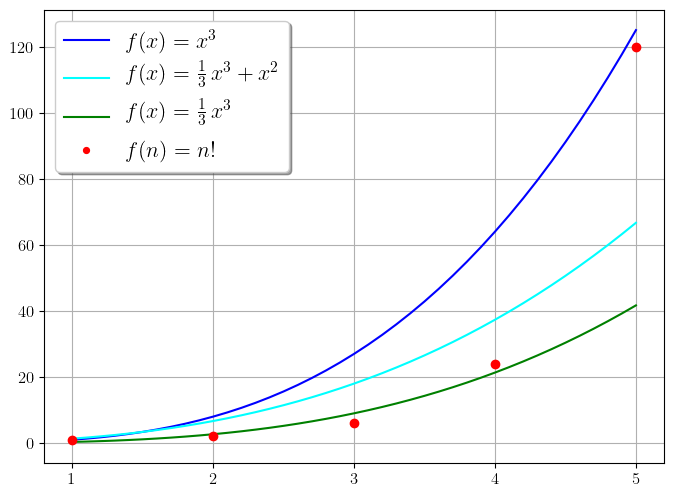

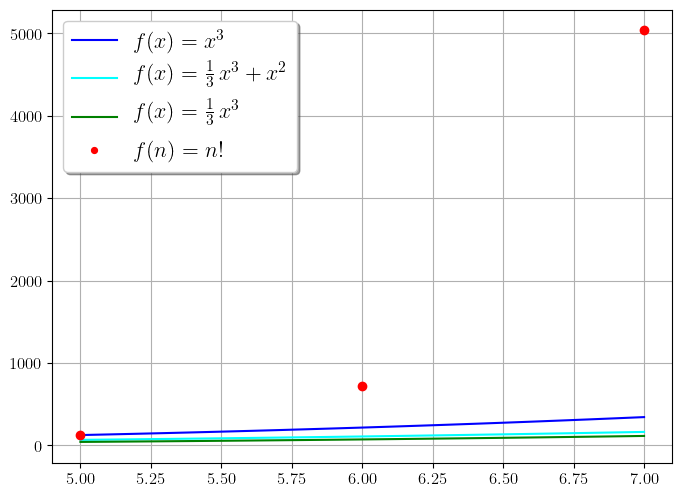

In [3]:
plt.rc('axes', grid=True, labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', markerscale=0.7, shadow=True, framealpha=1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


x = lambda a: a**3
y = lambda a: np.math.factorial(a)
z = lambda a: 1/3 * a**3
w = lambda a: 1/3 * a**3 + a**2

plt.figure(figsize=(8,6), dpi=100)
plt.plot(np.arange(1,5.1,0.1), [x(i) for i in np.arange(1,5.1,0.1)],
         color="blue", label=r"$f(x) = x^3$")
plt.plot(np.arange(1,5.1,0.1), [w(i) for i in np.arange(1,5.1,0.1)],
         color="cyan", label=r"$f(x) = \frac{1}{3} \, x^3 + x^2$")
plt.plot(np.arange(1,5.1,0.1), [z(i) for i in np.arange(1,5.1,0.1)],
         color="green", label=r"$f(x) = \frac{1}{3} \, x^3$")
plt.plot(np.arange(1,6), [y(i) for i in np.arange(1,6)], linestyle="None",
         marker="o", color="red", label=r"$f(n) = n!$")
plt.xticks(np.arange(1,6), ["1","2","3","4","5"])
plt.legend(loc=0, prop={'size':16})
plt.show()

plt.figure(figsize=(8,6), dpi=100)
plt.plot(np.arange(5,7.1,0.1), [x(i) for i in np.arange(5,7.1,0.1)],
         color="blue",label=r"$f(x) = x^3$")
plt.plot(np.arange(5,7.1,0.1), [w(i) for i in np.arange(5,7.1,0.1)],
         color="cyan", label=r"$f(x) = \frac{1}{3} \, x^3 + x^2$")
plt.plot(np.arange(5,7.1,0.1), [z(i) for i in np.arange(5,7.1,0.1)],
         color="green", label=r"$f(x) = \frac{1}{3} \, x^3$")
plt.plot(np.arange(5,8,1), [y(i) for i in np.arange(5,8,1)], linestyle="None",
         marker="o", color="red", label=r"$f(n) = n!$")
plt.legend(loc=0, prop={'size':16})
plt.show()


### Zeitmessung der einzelnen Funktionen

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in double_scalars


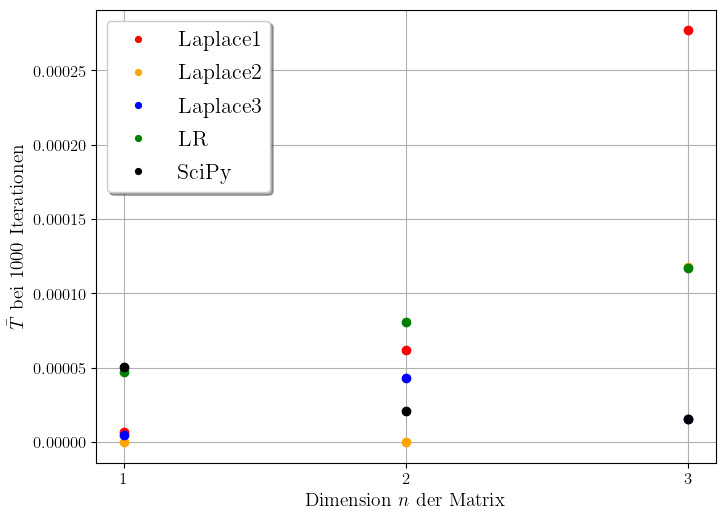

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in double_scalars


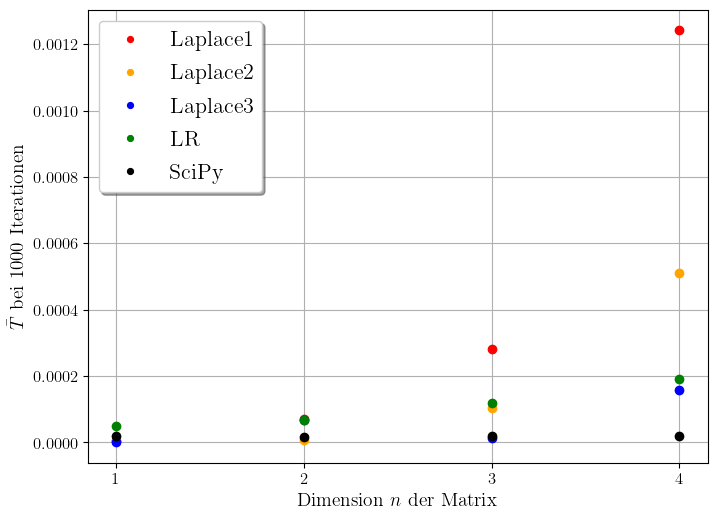

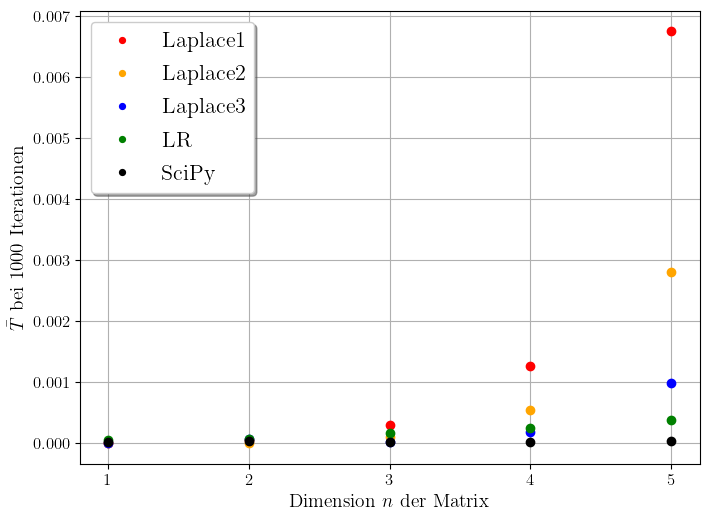

In [4]:
def get_Time(func, iterations, size):
    times = []
    for i in range(0, iterations):
        t1 = time.time()
        func(np.random.randint(0,10,(size,size)))
        t2 = time.time()
        times.append(t2-t1)
    return times


def time_Function(func, maxSize, iterations):
    res = []
    for n in range(1, maxSize+1):
        vals = get_Time(func, iterations, n)
        res.append(st.mean(vals))
    return res


def show_Results(maxSize, iterations):
    a = time_Function(laplace_1, maxSize, iterations)
    b = time_Function(laplace_2, maxSize, iterations)
    c = time_Function(laplace_3, maxSize, iterations)
    d = time_Function(LR, maxSize, iterations)
    e = time_Function(scipy.linalg.det, maxSize, iterations)

    x = [i for i in range(1, maxSize+1)]

    plt.figure(figsize=(8,6), dpi=100)
    plt.plot(x, a, linestyle="None", marker="o",color="red", label="Laplace1")
    plt.plot(x, b, linestyle="None", marker="o",color="orange", label="Laplace2")
    plt.plot(x, c, linestyle="None", marker="o",color="blue", label="Laplace3")
    plt.plot(x, d, linestyle="None", marker="o",color="green", label="LR")
    plt.plot(x, e, linestyle="None", marker="o", color="black", label="SciPy")
    plt.xticks(x, [str(i) for i in x])
    plt.xlabel(r"Dimension $n$ der Matrix")
    plt.ylabel(r"$\bar{T}$"+" bei {} Iterationen".format(iterations))
    plt.legend(loc=0, prop={'size':16})
    plt.show()

show_Results(3, 1000)
show_Results(4, 1000)
show_Results(5, 1000)


### Beispiel

In [5]:
array = np.array([[1, 7, 3, 0], [2, 4, 2, 5], [4, 0, 0, 3], [3, 5, 2, 1]])
print(array)

det = laplace_2(array)
print(det)

[[1 7 3 0]
 [2 4 2 5]
 [4 0 0 3]
 [3 5 2 1]]
10
